<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.导包并设置中文显示" data-toc-modified-id="1.导包并设置中文显示-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1.导包并设置中文显示</a></span></li><li><span><a href="#2.读取绘图所需数据--'BCIspeed.csv'-并查看数据" data-toc-modified-id="2.读取绘图所需数据--'BCIspeed.csv'-并查看数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.读取绘图所需数据  'BCIspeed.csv' 并查看数据</a></span></li><li><span><a href="#3.我们发现time列的数据需要修改,修改一下time列让每行时间都*24,并查看修改后的-数据" data-toc-modified-id="3.我们发现time列的数据需要修改,修改一下time列让每行时间都*24,并查看修改后的-数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3.我们发现time列的数据需要修改,修改一下time列让每行时间都*24,并查看修改后的 数据</a></span></li><li><span><a href="#4.绘制出刺豚鼠(agouti)每天活跃的时间段" data-toc-modified-id="4.绘制出刺豚鼠(agouti)每天活跃的时间段-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4.绘制出刺豚鼠(agouti)每天活跃的时间段</a></span></li><li><span><a href="#5.查看刺豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket)-之间的数据对比" data-toc-modified-id="5.查看刺豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket)-之间的数据对比-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5.查看刺豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket) 之间的数据对比</a></span></li></ul></div>

# 1.导包并设置中文显示

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
# windows 电脑中文配置
mpl.rcParams['font.family'] = 'SimHei'

# macos 电脑中文配置
# mpl.rcParams['font.family'] = 'Arial Unicode MS'

# 2.读取绘图所需数据  'BCIspeed.csv' 并查看数据
    - BCIspeed 中是巴拿马（Panama）动物园的动物抓拍数据
        - species 是动物名称
        - time 是动物被抓拍的时间
        - speed 是动物在被抓拍是的速度 米/秒

In [2]:
df = pd.read_csv('BCIspeed.csv')
df.head()

,species,time,speed
0,agouti,0.339028,0.2
1,agouti,0.582315,0.3
2,coati,0.592454,0.4
3,ocelot,0.509271,0.5
4,agouti,0.403553,0.6


# 3.我们发现time列的数据需要修改,修改一下time列让每行时间都*24,并查看修改后的 数据

In [3]:
df['time'] = df['time']*24
df.head()

,species,time,speed
0,agouti,8.136667,0.2
1,agouti,13.975556,0.3
2,coati,14.218889,0.4
3,ocelot,12.222500,0.5
4,agouti,9.685278,0.6


# 4.绘制出刺豚鼠(agouti)每天活跃的时间段

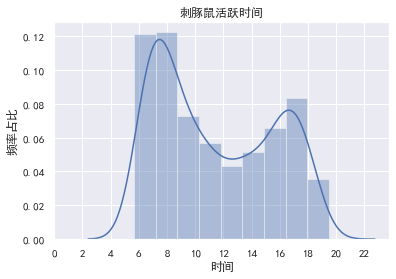

In [4]:
group = df.groupby('species')
agouti = group.get_group('agouti')
data = agouti['time']
sns.set(style='darkgrid',font='SimHei')
sns.distplot(data,kde=True)
plt.xlabel('时间')
plt.ylabel('频率占比')
plt.title('刺豚鼠活跃时间')
plt.xticks(range(24)[::2])
plt.show()

# 5.查看刺豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket) 之间的数据对比
    - 首先把豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket) 从表中提取出来
        - 可以通过 isin 来判断这一列是否是需求的数据,判断这一列是否在列表中, 存在返回True

In [5]:
data = df[df['species'].isin(['agouti','coati','brocket'])]

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


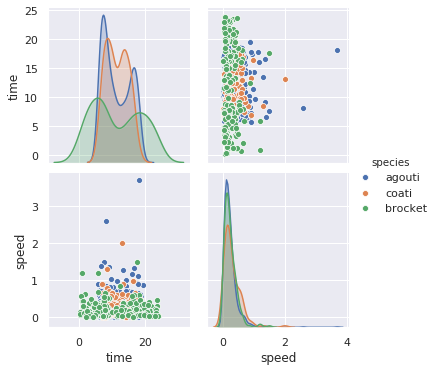

In [6]:
sns.pairplot(data,hue='species')
plt.show()